In [1]:
from sklearn.cluster import DBSCAN
import numpy as np

# Definir los datos
# datos = np.array([
#     [5.1, 3.5, 1.4, 0.2],
#     [4.9, 3.0, 1.4, 0.2],
#     # Aquí se colocan el resto de los datos
# ])


columna1 = [
    5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4,
    5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5, 5, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9,
    5, 5.5, 4.9, 4.4, 5.1, 5, 4.5, 4.4, 5, 5.1, 4.8, 5.1, 4.6, 5.3, 5, 7, 6.4, 6.9, 5.5,
    6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5, 5.9, 6, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1,
    6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6, 5.7, 5.5, 5.5, 5.8, 6, 5.4, 6, 6.7, 6.3, 5.6, 5.5,
    5.5, 6.1, 5.8, 5, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9,
    7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6, 6.9, 5.6, 7.7, 6.3,
    6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6, 6.9, 6.7,
    6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9
]

columna2 = [
    3.5, 3, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3, 3, 4, 4.4, 3.9, 3.5,
    3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1,
    3.2, 3.5, 3.6, 3, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
    3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2, 3, 2.2, 2.9, 2.9, 3.1, 3, 2.7, 2.2, 2.5,
    3.2, 2.8, 2.5, 2.8, 2.9, 3, 2.8, 3, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3, 3.4, 3.1, 2.3,
    3, 2.5, 2.6, 3, 2.6, 2.3, 2.7, 3, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3, 2.9, 3, 3, 2.5,
    2.9, 2.5, 3.6, 3.2, 2.7, 3, 2.5, 2.8, 3.2, 3, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7,
    3.3, 3.2, 2.8, 3, 2.8, 3, 2.8, 3.8, 2.8, 2.8, 2.6, 3, 3.4, 3.1, 3, 3.1, 3.1, 3.1,
    2.7, 3.2, 3.3, 3, 2.5, 3, 3.4, 3
]

columna3 = [
    1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3,
    1.4, 1.7, 1.5, 1.7, 1.5, 1, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4,
    1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7,
    4.5, 4.9, 4, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5,
    3.9, 4.8, 4, 4.9, 4.7, 4.3, 4.4, 4.8, 5, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7,
    4.4, 4.1, 4, 4.4, 4.6, 4, 3.3, 4.2, 4.2, 4.2, 4.3, 3, 4.1, 6, 5.1, 5.9, 5.6, 5.8, 6.6,
    4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5, 5.1, 5.3, 5.5, 6.7, 6.9, 5, 5.7, 4.9, 6.7, 4.9,
    5.7, 6, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1,
    5.1, 5.9, 5.7, 5.2, 5, 5.2, 5.4, 5.1
]


# Combina las columnas en un solo conjunto de datos
datos = np.column_stack((columna1, columna2, columna3))

# Ajustar el modelo DBSCAN
epsilon = 0.5  # Este valor debe ser ajustado según tus datos
min_samples = 5  # Este valor también debe ser ajustado
modelo_dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
modelo_dbscan.fit(datos)

# Mostrar los resultados
print("Etiquetas de clúster asignadas por DBSCAN:")
print(modelo_dbscan.labels_)


Etiquetas de clúster asignadas por DBSCAN:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


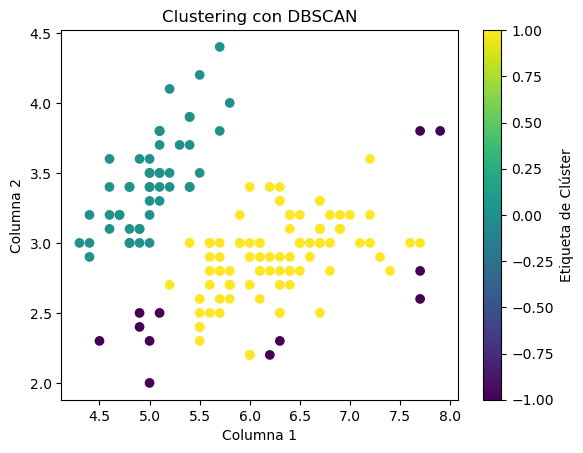

In [2]:
import matplotlib.pyplot as plt

columna1 = [
    5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4,
    5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5, 5, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9,
    5, 5.5, 4.9, 4.4, 5.1, 5, 4.5, 4.4, 5, 5.1, 4.8, 5.1, 4.6, 5.3, 5, 7, 6.4, 6.9, 5.5,
    6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5, 5.9, 6, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1,
    6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6, 5.7, 5.5, 5.5, 5.8, 6, 5.4, 6, 6.7, 6.3, 5.6, 5.5,
    5.5, 6.1, 5.8, 5, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9,
    7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6, 6.9, 5.6, 7.7, 6.3,
    6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6, 6.9, 6.7,
    6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9
]

columna2 = [
    3.5, 3, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3, 3, 4, 4.4, 3.9, 3.5,
    3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1,
    3.2, 3.5, 3.6, 3, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
    3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2, 3, 2.2, 2.9, 2.9, 3.1, 3, 2.7, 2.2, 2.5,
    3.2, 2.8, 2.5, 2.8, 2.9, 3, 2.8, 3, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3, 3.4, 3.1, 2.3,
    3, 2.5, 2.6, 3, 2.6, 2.3, 2.7, 3, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3, 2.9, 3, 3, 2.5,
    2.9, 2.5, 3.6, 3.2, 2.7, 3, 2.5, 2.8, 3.2, 3, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7,
    3.3, 3.2, 2.8, 3, 2.8, 3, 2.8, 3.8, 2.8, 2.8, 2.6, 3, 3.4, 3.1, 3, 3.1, 3.1, 3.1,
    2.7, 3.2, 3.3, 3, 2.5, 3, 3.4, 3
]

etiquetas = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,
             0, 0, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1,
             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1,
             1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1,
             1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 1]

# Crear un scatter plot con colores según las etiquetas de clúster
plt.scatter(columna1, columna2, c=etiquetas, cmap='viridis')

# Etiquetas y título
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.title('Clustering con DBSCAN')

# Mostrar el plot
plt.colorbar(label='Etiqueta de Clúster')
plt.show()